## Reduccion de Dimensionalidad para Clasificacion

### a) 
Construya un dataframe con los datos a analizar descargando los datos desde la URL [3]. Determine
cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine
además el número promedio de palabras por ´ıtem en cada clase.

In [2]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

In [3]:
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)


print "El conjunto de entrenamiento tiene {0} filas y {1} columnas".format(train_df.shape[0], train_df.shape[1])
print train_df


El conjunto de entrenamiento tiene 528 filas y 11 columnas
            y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9  \
row.names                                                                      
1           1 -3.639  0.418 -0.670  1.779 -0.168  1.627 -0.388  0.529 -0.874   
2           2 -3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.510 -0.621   
3           3 -2.120  0.894 -1.576  0.147 -0.707  1.559 -0.579  0.676 -0.809   
4           4 -2.287  1.809 -1.498  1.012 -1.053  1.060 -0.567  0.235 -0.091   
5           5 -2.598  1.938 -0.846  1.062 -1.633  0.764  0.394 -0.150  0.277   
6           6 -2.852  1.914 -0.755  0.825 -1.588  0.855  0.217 -0.246  0.238   
7           7 -3.482  2.524 -0.433  1.048 -1.995  0.902  0.322  0.450  0.377   
8           8 -3.941  2.305  0.124  1.771 -1.815  0.593 -0.435  0.992  0.575   
9           9 -3.860  2.116 -0.939  0.688 -0.675  1.679 -0.512  0.928 -0.167   
10         10 -3.648  1.812 -1.378  1.578  0.065  1.577 -0.46

## b)
 Construya matrices X e y que contengan las caracter´ısticas y las etiquetas correspondientes a los datos
de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

In [4]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values

X_t = test_df.ix[:,'x.1':'x.10'].values
y_t = test_df.ix[:,'y'].values

X_std = StandardScaler().fit_transform(X) #Estandarizar características mediante la eliminación de la media 
                                          #y la varianza.
X_tst = StandardScaler().fit_transform(X_t)

## c)
Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

In [7]:
print Xred_pca 

[[ 1.31434474 -1.68519576]
 [ 1.45161624 -1.68308112]
 [ 2.105679   -1.0744288 ]
 ..., 
 [-0.5656308   2.01850508]
 [-1.2732728   2.09729001]
 [-1.03842927 -0.05286203]]


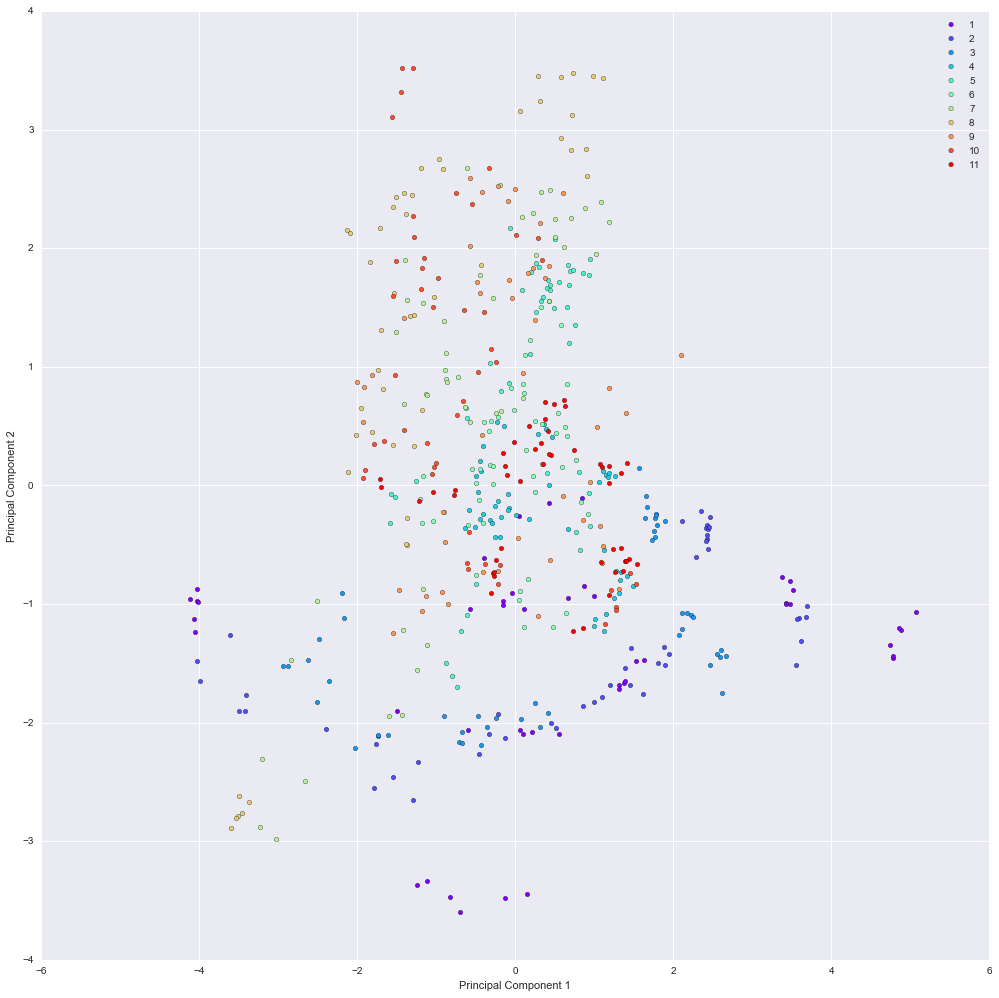

In [30]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sklearn_pca = PCA(n_components=2) #2 dimensiones PCA
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('rainbow')

mclasses=(1,2,3,4,5,6,7,8,9, 10, 11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(17, 17))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## d) 
Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) iden-
tificando cada clase con un color distinto (elija una paleta apropiada).

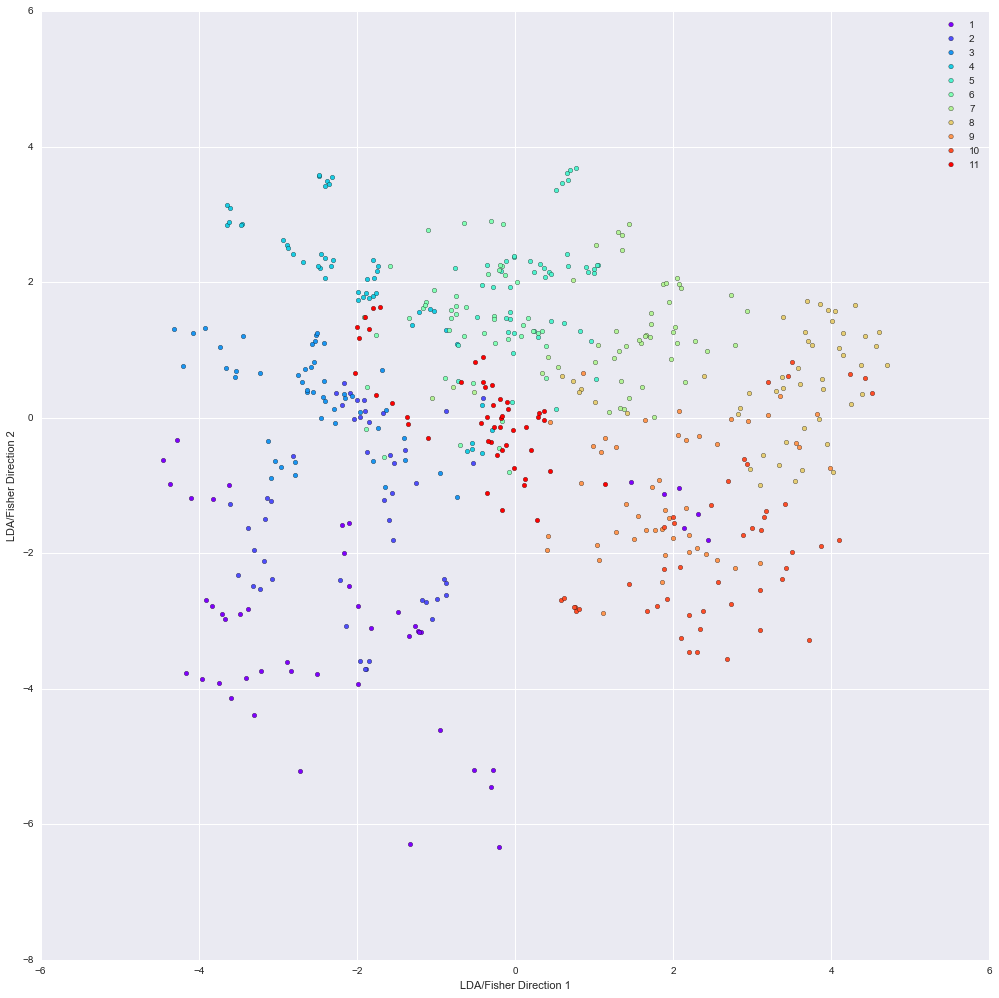

In [34]:
from sklearn.lda import LDA

sklearn_lda = LDA(n_components=2) #2 dimensiones LDA
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('rainbow')

mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(17, 17))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
    
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()


## e)
Compare cualitativamente los resultados obtenidos en 1 y 2. Proponga un metodo para elegir una
técnica de reducción de dimensionalidad.

## f)
Construya un clasificador que determine la clase de un dato x aleatoriamente sin considerar las caracteristicas sino que solamente la probabilidad a-priori de cada clase. Por ejemplo, si la clase y = 0 ocurre el 25% de las veces, su clasificador debe predecir esta clase para un determinado x con probabilidad 0.25, independiente de los atributos de x.

In [35]:
def blind_classificador():
    p = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    for index, row in train_df.iterrows():
        p[int(row['y'])-1]+=1.0
        
    p=p/528.0    
    
    for i in range(0,11): 
        print "Clase %d = %f" %(i+1,p[i])


blind_classificador()


Clase 1 = 0.090909
Clase 2 = 0.090909
Clase 3 = 0.090909
Clase 4 = 0.090909
Clase 5 = 0.090909
Clase 6 = 0.090909
Clase 7 = 0.090909
Clase 8 = 0.090909
Clase 9 = 0.090909
Clase 10 = 0.090909
Clase 11 = 0.090909


## g)
Compare el desempeno de LDA, QDA y un modelo de Vecinos Más Cercanos (k-NN) sin reducir dimensionalidad. ¿Que tecnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un gráfico, el efecto de cambiar el parámetro de k en el tercer modelo.

In [36]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print "LDA Score fitting Training:", lda_model.score(X_std,y)
print "LDA Score fitting Test:", lda_model.score(X_std_test,ytest)
print "\n"
qda_model = QDA()
qda_model.fit(X_std,y)
print "QDA Score fitting Training:", qda_model.score(X_std, y)
print "QDA Score fitting Test:", qda_model.score(X_std_test,ytest)
print "\n"
knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform")
knn_model.fit(X_std,y)
print "Knn Score uniform fitting Training:", knn_model.score(X_std, y)
print "Knn Score uniform fitting Test:", knn_model.score(X_std_test,ytest)
print "\n"
knn_model = KNeighborsClassifier(n_neighbors=10, weights="distance")
knn_model.fit(X_std,y)
print "Knn Score distance fitting Training:", knn_model.score(X_std, y)
print "Knn Score distance fitting Test:", knn_model.score(X_std_test,ytest)


LDA Score fitting Training: 0.683712121212
LDA Score fitting Test: 0.452380952381


QDA Score fitting Training: 0.988636363636
QDA Score fitting Test: 0.415584415584


Knn Score uniform fitting Training: 0.931818181818
Knn Score uniform fitting Test: 0.491341991342


Knn Score distance fitting Training: 1.0
Knn Score distance fitting Test: 0.487012987013


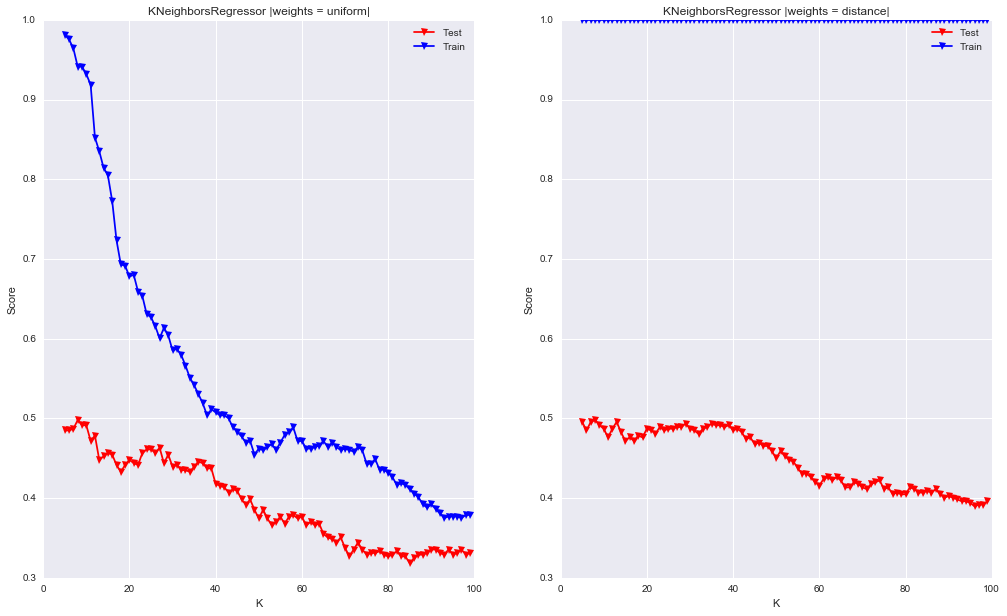

In [37]:

s_tr = []
s_te = []
for k in range(5,100):
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(X_std,y)
    s_tr.append(knn.score(X_std, y))
    s_te.append(knn.score(X_std_test, ytest))

plt.figure(figsize=(17, 10))
plt.subplot(1, 2, 1)
plt.plot(range(5,100), s_te, c='r', marker='v', label='Test')
plt.plot(range(5,100), s_tr, c='b', marker='v', label='Train')

plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.title("KNeighborsRegressor |weights = uniform|")

s_tr = []
s_te = []
for k in range(5,100):
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(X_std,y)
    s_tr.append(knn.score(X_std, y))
    s_te.append(knn.score(X_std_test, ytest))

plt.subplot(1, 2, 2)
plt.plot(range(5,100), s_te, c='r', marker='v', label='Test')
plt.plot(range(5,100), s_tr, c='b', marker='v', label='Train')

plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.title("KNeighborsRegressor |weights = distance|")

plt.show()

## g)
Utilice PCA para generar una representación de la data en d 0 = 1,2,3,...,10 dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus d 0 . Sobreponga a este gráfico el error de pruebas versus d 0 . Concluya.

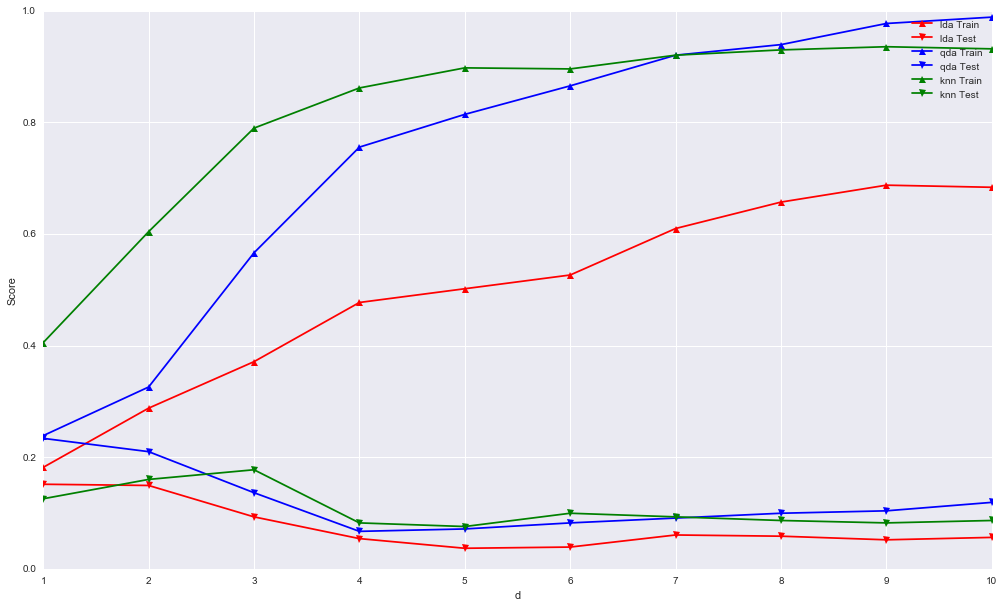

In [55]:
dim = range(1,11)
lda_tr = []
qda_tr = []
knn_tr = []

lda_tr_t = []
qda_tr_t = []
knn_tr_t = []

for d in dim:
    sklearn_pca = PCA(n_components=d) #2 dimensiones PCA
    Xred_pca = sklearn_pca.fit_transform(X_std)
    Yred_pca = sklearn_pca.fit_transform(X_std_test)
    
    lda_model = LDA()
    lda_model.fit(Xred_pca,y)
    lda_tr.append(lda_model.score(Xred_pca,y))
    lda_tr_t.append(lda_model.score(Yred_pca,ytest))
    
    qda_model = QDA()
    qda_model.fit(Xred_pca,y)
    qda_tr.append(qda_model.score(Xred_pca, y))
    qda_tr_t.append(qda_model.score(Yred_pca,ytest))
    
    knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform")
    knn_model.fit(Xred_pca,y)
    knn_tr.append(knn_model.score(Xred_pca, y))
    knn_tr_t.append(knn_model.score(Yred_pca,ytest))

plt.figure(figsize=(17, 10))
plt.plot(dim, lda_tr, c='r', marker='^', label='lda Train')
plt.plot(dim, lda_tr_t, c='r', marker='v', label='lda Test')
plt.plot(dim, qda_tr, c='b', marker='^', label='qda Train')
plt.plot(dim, qda_tr_t, c='b', marker='v', label='qda Test')
plt.plot(dim, knn_tr, c='g', marker='^', label='knn Train')
plt.plot(dim, knn_tr_t, c='g', marker='v', label='knn Test')

plt.xlabel("d")
plt.ylabel("Score")
plt.legend()

## h)
Utilice LDA para generar una representación de la data en d 0 = 1,2,3,...,10 dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus d 0 . Sobreponga a este gráfico el error de pruebas versus d 0 . Concluya

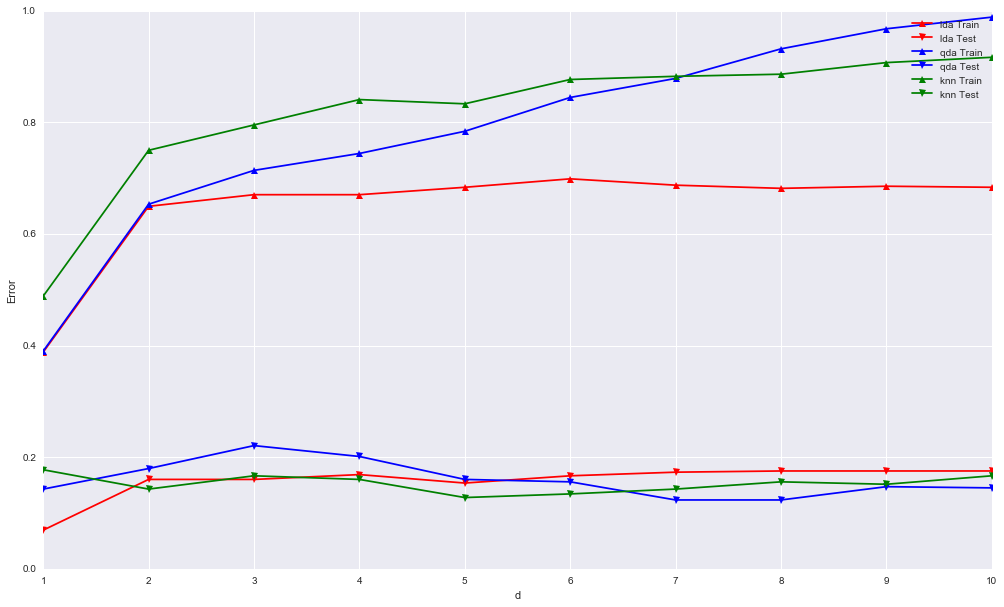

In [53]:
dim = range(1,11)
lda_tr = []
qda_tr = []
knn_tr = []

lda_tr_t = []
qda_tr_t = []
knn_tr_t = []

for d in dim:
    sklearn_pca = LDA(n_components=d) #2 dimensiones PCA
    Xred_pca = sklearn_pca.fit_transform(X_std, y)
    Yred_pca = sklearn_pca.fit_transform(X_std_test, ytest)
    
    lda_model = LDA()
    lda_model.fit(Xred_pca,y)
    lda_tr.append(lda_model.score(Xred_pca,y))
    lda_tr_t.append(lda_model.score(Yred_pca,ytest))
    
    qda_model = QDA()
    qda_model.fit(Xred_pca,y)
    qda_tr.append(qda_model.score(Xred_pca, y))
    qda_tr_t.append(qda_model.score(Yred_pca,ytest))
    
    knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform")
    knn_model.fit(Xred_pca,y)
    knn_tr.append(knn_model.score(Xred_pca, y))
    knn_tr_t.append(knn_model.score(Yred_pca,ytest))

plt.figure(figsize=(17, 10))
plt.plot(dim, lda_tr, c='r', marker='^', label='lda Train')
plt.plot(dim, lda_tr_t, c='r', marker='v', label='lda Test')
plt.plot(dim, qda_tr, c='b', marker='^', label='qda Train')
plt.plot(dim, qda_tr_t, c='b', marker='v', label='qda Test')
plt.plot(dim, knn_tr, c='g', marker='^', label='knn Train')
plt.plot(dim, knn_tr_t, c='g', marker='v', label='knn Test')

plt.xlabel("d")
plt.ylabel("Error")
plt.legend()